### 본격적인 데이터 분석에 앞서, 필요한 모듈을 정의한다.

In [33]:
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')

### 데이터를 불러오고 전처리를 진행한다 (data filitering, data transformation)

In [3]:
print('제외된 노선입니다. :', 'N850, 9709, 서대문15, 8002, 8003, 9709, 마포18-1, 8112')

제외된 노선입니다. : N850, 9709, 서대문15, 8002, 8003, 9709, 마포18-1, 8112


In [6]:
bus = pd.read_csv('bus_transaction.csv',encoding='cp949')

In [7]:
bus_use = bus[['노선번호_1월','승차_1월', '승차_2월', '승차_3월', '승차_4월', '승차_5월', '승차_6월',
              '승차_7월', '승차_8월', '승차_9월', '승차_10월']]
bus_usecnt = bus[['승차_1월', '승차_2월', '승차_3월', '승차_4월', '승차_5월', '승차_6월',
              '승차_7월', '승차_8월', '승차_9월', '승차_10월']]

In [9]:
bus_usecnt

,승차_1월,승차_2월,승차_3월,승차_4월,승차_5월,승차_6월,승차_7월,승차_8월,승차_9월,승차_10월
0,166568,142700,120347,122239,137603,146884,164389,143556,135736,142344
1,561,8909,11849,15884,18394,20309,22760,18924,15607,17086
2,625,10089,11517,14439,17082,19439,22052,18411,15244,16478
3,81953,53652,49361,71837,65117,52645,60548,45511,57525,87124
4,37045,2441,1703,2005,3081,3579,4758,3815,2819,3762
...,...,...,...,...,...,...,...,...,...,...
612,89731,66147,49527,56399,71498,68985,78149,62474,59045,72042
613,71348,60881,51581,54253,57379,64197,69908,60703,57869,58359
614,26461,21423,17471,19840,22646,27189,26912,20745,21146,23461
615,11530,9938,9219,9916,10912,11151,11968,10425,9978,10736


In [10]:
bus_use =bus_use.drop_duplicates('노선번호_1월')[0:617] # 데이터의 오염이 확인되어 이를 제거함.

In [11]:
bus_use.describe()

,승차_1월,승차_2월,승차_3월,승차_4월,승차_5월,승차_6월,승차_7월,승차_8월,승차_9월,승차_10월
count,6.170000e+02,617.000000,617.000000,617.000000,617.000000,617.000000,6.170000e+02,617.000000,617.000000,617.000000
mean,2.323381e+05,199556.283630,170545.094003,178782.390600,196758.482982,208487.050243,2.221483e+05,189325.983793,178986.466775,199483.850891
std,1.915593e+05,165484.960323,144782.304466,151865.932586,165574.318832,172915.657775,1.836104e+05,155046.118921,149113.836409,167624.822955
min,2.000000e+00,131.000000,230.000000,480.000000,565.000000,302.000000,1.870000e+02,113.000000,450.000000,798.000000
25%,8.699300e+04,73824.000000,61614.000000,63705.000000,70590.000000,76537.000000,8.238600e+04,70924.000000,62573.000000,71675.000000
50%,1.842440e+05,155966.000000,128697.000000,135147.000000,150866.000000,161495.000000,1.714460e+05,151254.000000,138830.000000,154369.000000
75%,3.268190e+05,282029.000000,243429.000000,256992.000000,281036.000000,299019.000000,3.206870e+05,268551.000000,257580.000000,288199.000000
max,1.089678e+06,907775.000000,760133.000000,803274.000000,885125.000000,945683.000000,1.020915e+06,840618.000000,786313.000000,923627.000000


In [12]:
print('결측치의 수는', sum(bus_use['노선번호_1월'].isnull()), '개 입니다.') # 결측치 유무 확인

결측치의 수는 0 개 입니다.


In [13]:
bus_usecnt.info() # 데이터를 전체적으로 살펴본다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   승차_1월   617 non-null    int64
 1   승차_2월   617 non-null    int64
 2   승차_3월   617 non-null    int64
 3   승차_4월   617 non-null    int64
 4   승차_5월   617 non-null    int64
 5   승차_6월   617 non-null    int64
 6   승차_7월   617 non-null    int64
 7   승차_8월   617 non-null    int64
 8   승차_9월   617 non-null    int64
 9   승차_10월  617 non-null    int64
dtypes: int64(10)
memory usage: 48.3 KB


In [14]:
# 데이터의 형변환을 실시한다.
bus_usecnt['승차_1월'].astype('float64')
bus_usecnt['승차_2월'].astype('float64')
bus_usecnt['승차_3월'].astype('float64')
bus_usecnt['승차_4월'].astype('float64')
bus_usecnt['승차_5월'].astype('float64')
bus_usecnt['승차_6월'].astype('float64')
bus_usecnt['승차_7월'].astype('float64')
bus_usecnt['승차_8월'].astype('float64')
bus_usecnt['승차_9월'].astype('float64')
bus_usecnt['승차_10월'].astype('float64')

0      142344.0
1       17086.0
2       16478.0
3       87124.0
4        3762.0
         ...   
612     72042.0
613     58359.0
614     23461.0
615     10736.0
616    144834.0
Name: 승차_10월, Length: 617, dtype: float64

### 데이터 전처리
 * 절대적 수치비교는 논리적 비약이 있으리라 예상되어 scale을 고려한 정규화를 진행함
 * 일반 정규화 와 표준 정규화 중 데이터의 분포를 고려한 표준 정규화 방법을 사용하여 진행하였음.

In [15]:
feature = bus_usecnt.values
feature

array([[166568, 142700, 120347, ..., 143556, 135736, 142344],
       [   561,   8909,  11849, ...,  18924,  15607,  17086],
       [   625,  10089,  11517, ...,  18411,  15244,  16478],
       ...,
       [ 26461,  21423,  17471, ...,  20745,  21146,  23461],
       [ 11530,   9938,   9219, ...,  10425,   9978,  10736],
       [167147, 144543, 126022, ..., 136576, 127499, 144834]])

In [16]:
def ratio_transform(data) :
    ratio_result = np.array([ (x - np.mean(x)) / np.std(x) for x in data ])
    return ratio_result

In [17]:
ratio_bususe = ratio_transform(feature)
ratio_data = pd.DataFrame(ratio_bususe)
ratio_data.columns = bus_usecnt.columns

In [18]:
ratio_8 = ratio_data[['승차_1월', '승차_2월', '승차_3월', '승차_4월', '승차_5월', '승차_6월', '승차_7월', '승차_8월']]

### 군집분석을 사용하여 본격적인 데이터분석에 돌입한다.
 * 적정 클러스터의 개수를 찾기 위해 elbow method를 사용한다.

In [19]:
distortions = []
for K in range(1,10) :
    kmeanModel = KMeans(n_clusters=K)
    kmeanModel.fit(ratio_8)
    distortions.append(kmeanModel.inertia_)

/Users/kyuwoncho/anaconda3/envs/q1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kyuwoncho/anaconda3/envs/q1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kyuwoncho/anaconda3/envs/q1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kyuwoncho/anaconda3/envs/q1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

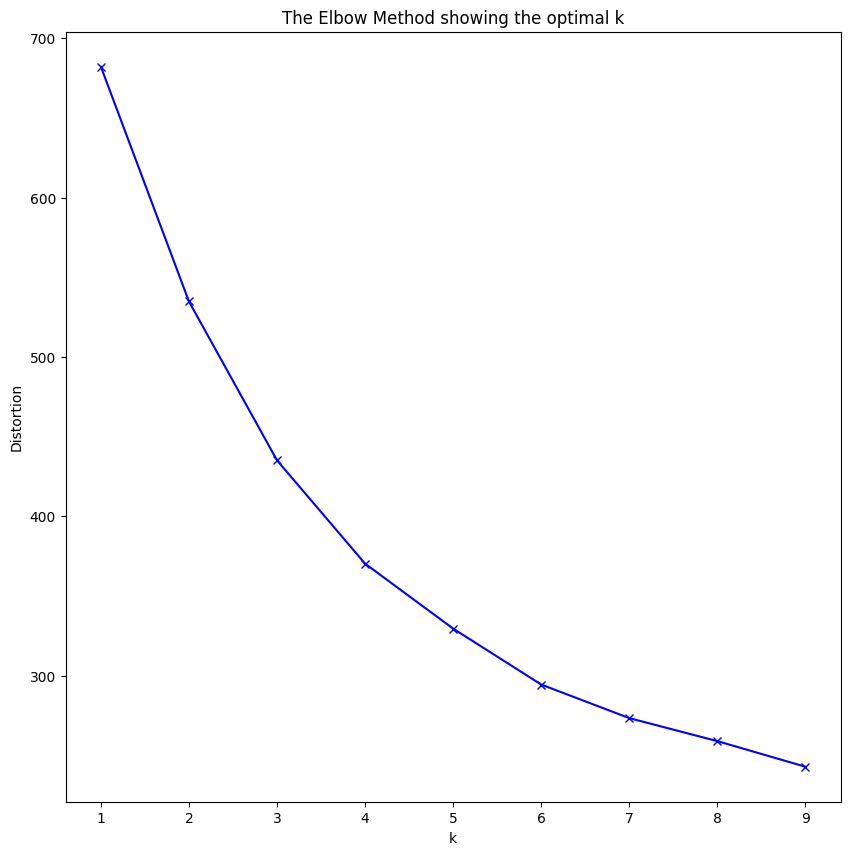

In [20]:
plt.figure(figsize=(10,10))
plt.plot(range(1,10), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### 군집분석을 사용하여 본격적인 데이터분석에 돌입한다.
 * 적정 클러스터의 개수를 3로 설정하고, 군집분석 비지도학습을 한다.

In [21]:
n_clustering = 5 # 상기 elbow method의 결과를 활용하여 클러스터의 수를 3으로 지정함.
km = KMeans(n_clusters = n_clustering)
km.fit(ratio_8)
predict_result = km.predict(ratio_8)
print(predict_result)
len(predict_result) # 군집화가 제대로 되었는지 확인한다.

[2 3 3 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 4 2 2 1 1 1 4 4 0 3 0 1 0 4 2 0 2 4 2
 2 2 2 1 1 1 2 4 0 2 0 4 1 1 2 1 1 4 1 4 4 2 2 2 2 2 0 1 1 1 4 2 1 1 2 1 1
 1 1 1 1 1 1 4 1 1 1 1 4 4 1 2 2 1 2 2 2 1 0 1 0 2 4 2 2 2 2 1 1 2 1 4 0 2
 2 1 1 1 1 0 1 2 1 2 2 1 1 4 4 0 2 2 2 2 0 0 0 1 1 2 2 0 2 2 1 2 2 1 2 4 2
 2 2 2 2 4 2 1 1 1 2 1 1 2 1 1 0 2 1 2 2 4 1 2 4 4 2 1 4 2 1 1 4 1 1 2 1 0
 1 1 2 1 1 4 0 1 1 2 2 2 2 0 0 0 0 2 2 2 1 0 2 0 0 2 1 0 1 1 2 0 0 0 4 2 1
 1 2 2 1 2 1 0 1 1 1 2 1 2 1 2 1 2 2 4 0 1 2 0 0 4 2 2 2 2 2 3 4 2 2 2 4 4
 2 4 2 2 0 2 2 2 1 2 2 2 0 0 2 2 2 2 2 0 4 4 2 2 0 1 4 4 1 4 2 1 1 2 4 4 2
 1 4 0 1 1 0 1 1 1 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 4 2 0 1 4 0 2 2 2 2 2 2
 4 1 4 4 2 4 2 2 0 4 4 4 4 4 4 4 0 0 3 4 3 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 1
 1 1 0 2 2 0 2 1 2 0 0 2 0 2 0 0 0 0 2 1 1 2 0 0 0 1 2 2 2 0 0 0 0 2 2 2 0
 2 2 0 2 2 0 4 0 2 0 1 0 0 0 0 0 2 2 0 2 2 2 0 2 2 4 2 2 1 2 4 2 2 2 0 2 2
 2 2 4 4 0 2 2 0 0 2 2 4 0 0 0 0 0 2 2 0 0 0 2 2 0 0 2 0 0 2 0 2 0 0 4 0 0
 1 4 0 0 2 2 4 0 2 0 2 2 

/Users/kyuwoncho/anaconda3/envs/q1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


617

In [22]:
labels = [] # 클러스터별 라벨링
sizes = [] # 클러스터의 각 size(전체에서 몇 %를 차지하고 있는지에 대한 값의 변수정의)
for i in range(0, n_clustering) :
    labels.append("클러스터" + str(i))
    sizes.append(collections.Counter(predict_result)[i])

In [25]:
pcaresult = pca.fit_transform(bus_usecnt[~np.isnan(bus_usecnt).any(axis=1)])
pcaresult

array([[-175988.54873864,    1666.83192273],
       [-580702.87048028,   22537.64348934],
       [-582220.27653362,   21121.0332484 ],
       ...,
       [-555321.37749735,    4606.3592822 ],
       [-594178.20110322,    5024.89625689],
       [-176484.25326833,     750.11602079]])

In [26]:
bus_usecnt

,승차_1월,승차_2월,승차_3월,승차_4월,승차_5월,승차_6월,승차_7월,승차_8월,승차_9월,승차_10월
0,166568,142700,120347,122239,137603,146884,164389,143556,135736,142344
1,561,8909,11849,15884,18394,20309,22760,18924,15607,17086
2,625,10089,11517,14439,17082,19439,22052,18411,15244,16478
3,81953,53652,49361,71837,65117,52645,60548,45511,57525,87124
4,37045,2441,1703,2005,3081,3579,4758,3815,2819,3762
...,...,...,...,...,...,...,...,...,...,...
612,89731,66147,49527,56399,71498,68985,78149,62474,59045,72042
613,71348,60881,51581,54253,57379,64197,69908,60703,57869,58359
614,26461,21423,17471,19840,22646,27189,26912,20745,21146,23461
615,11530,9938,9219,9916,10912,11151,11968,10425,9978,10736


Text(0.5, 1.0, '주성분분석 결과')

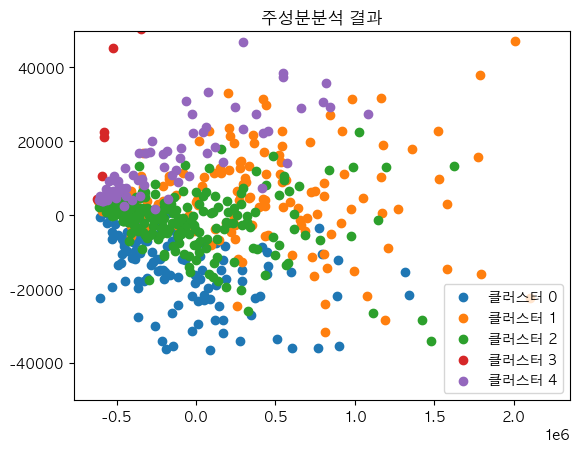

In [34]:
pca = PCA(n_components=2)  # 주성분분석을 진행해 군집화가 얼마나 잘됐는지 알아본다.
pcaresult = pca.fit_transform(bus_usecnt[~np.isnan(bus_usecnt).any(axis=1)])
for i in range(0, n_clustering):
    label_name = "클러스터 " +str(i)
    #plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.scatter(pcaresult[predict_result==i][:,0],pcaresult[predict_result==i][:,1],label=label_name)
    #plt.scatter(pcaresult[[predict_result==i]][:,0],pcaresult[[predict_result==i]][:,1],label=label_name)
    plt.ylim(-50000, 50000)
plt.legend()
plt.title('주성분분석 결과')

Text(0.5, 1.2, '클러스터 분포')

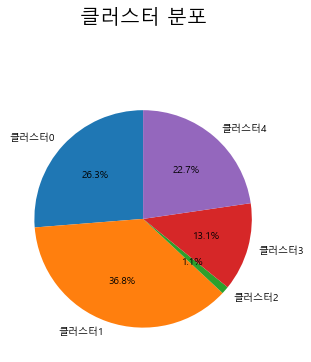

In [219]:
plt.figure(figsize=(10,5))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.pie(sizes,labels=labels,startangle=90,autopct='%1.1f%%')
plt.title("클러스터 분포",position=(0.5,1.2),fontsize=20)

In [36]:
ratio_8

,승차_1월,승차_2월,승차_3월,승차_4월,승차_5월,승차_6월,승차_7월,승차_8월
0,1.699753,0.032372,-1.529172,-1.397000,-0.323696,0.324660,1.547531,0.092171
1,-2.358331,-0.997514,-0.518261,0.139489,0.548646,0.860813,1.260353,0.635042
2,-2.426600,-0.775913,-0.526845,-0.017198,0.443788,0.854890,1.310642,0.675589
3,1.470965,-0.672061,-0.996986,0.704955,0.196099,-0.748313,-0.149878,-1.288519
4,2.989075,-0.397295,-0.469516,-0.439962,-0.334664,-0.285929,-0.170552,-0.262834
...,...,...,...,...,...,...,...,...
612,2.046096,-0.114778,-1.637579,-1.007935,0.375505,0.145252,0.984900,-0.451315
613,1.784245,0.038886,-1.511878,-1.066325,-0.545068,0.591825,1.544127,0.009205
614,1.204367,-0.421638,-1.697139,-0.932548,-0.026917,1.439328,1.349926,-0.640461
615,1.192611,-0.800290,-1.700350,-0.827830,0.418985,0.718170,1.740909,-0.190653


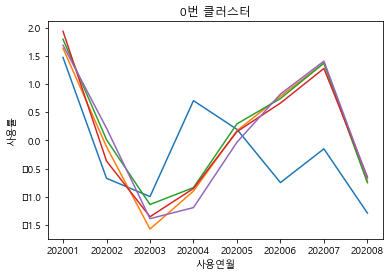

In [227]:
for i in range(0, 5) :
    plt.plot(['202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008'],
             ratio_8[predict_result == 0].iloc[i])
    plt.title('0번 클러스터')
    plt.xlabel('사용연월')
    plt.ylabel('사용률')

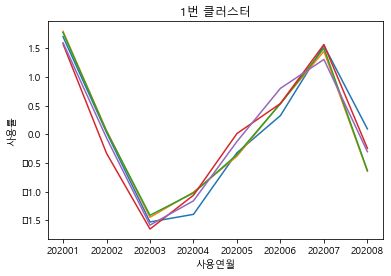

In [229]:
for i in range(0, 5) :
    plt.plot(['202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008'],
             ratio_8[predict_result == 1].iloc[i])
    plt.title('1번 클러스터')
    plt.xlabel('사용연월')
    plt.ylabel('사용률')

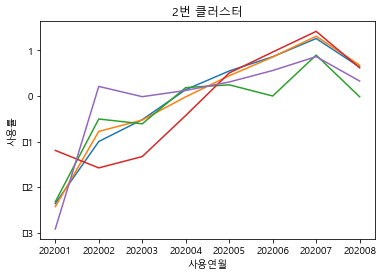

In [230]:
for i in range(0, 5) :
    plt.plot(['202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008'],
             ratio_8[predict_result == 2].iloc[i])
    plt.title('2번 클러스터')
    plt.xlabel('사용연월')
    plt.ylabel('사용률')

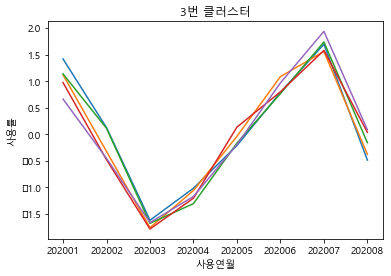

In [231]:
for i in range(0, 5) :
    plt.plot(['202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008'],
             ratio_8[predict_result == 3].iloc[i])
    plt.title('3번 클러스터')
    plt.xlabel('사용연월')
    plt.ylabel('사용률')

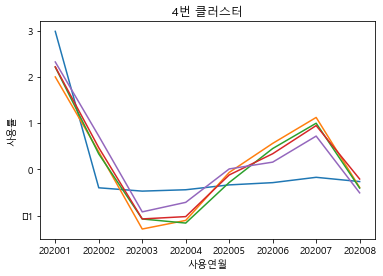

In [232]:
for i in range(0, 5) :
    plt.plot(['202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008'],
             ratio_8[predict_result == 4].iloc[i])
    plt.title('4번 클러스터')
    plt.xlabel('사용연월')
    plt.ylabel('사용률')